# Assignment 1, Task 1 - KMeans clustering


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style("darkgrid")
sns.set(font_scale=1.3)

## Data import and description

In [3]:
data = pd.read_csv('data.csv')
data.head()

,height,tail length,leg length,nose circumference
0,5.151,3.535,1.414,0.202
1,4.949,3.030,1.414,0.202
2,4.747,3.232,1.313,0.202
3,4.646,3.131,1.515,0.202
4,5.050,3.636,1.414,0.202


### Dataset size

In [4]:
data.count()  # values counts by column

height                300
tail length           300
leg length            300
nose circumference    300
dtype: int64

In [5]:
data.isna().sum()  # missing values count by column

height                0
tail length           0
leg length            0
nose circumference    0
dtype: int64

### Feature data types

In [6]:
data.dtypes

height                float64
tail length           float64
leg length            float64
nose circumference    float64
dtype: object

In [7]:
(data - data.round()).astype(bool).any()  # Confirm numerical type: 'True' indicates non-zero decimal expansion -> float

height                True
tail length           True
leg length            True
nose circumference    True
dtype: bool

## EDA

In [8]:
summary = data.describe()

# add range
summary = summary.append((data.max() - data.min()).rename('range'))

summary = summary.append(((data.mean() - data.median())/data.mean() * 100).rename('mean-median %'))

summary.round(3)

,height,tail length,leg length,nose circumference
count,300.000,300.000,300.000,300.000
mean,5.931,3.103,3.814,1.217
std,0.840,0.442,1.789,0.772
min,4.343,2.020,1.010,0.101
25%,5.202,2.828,1.616,0.305
50%,5.858,3.060,4.415,1.326
75%,6.528,3.366,5.202,1.836
max,8.058,4.488,7.038,2.550
range,3.715,2.468,6.028,2.449
mean-median %,1.231,1.392,-15.747,-8.928


In [9]:
z_scores = ((data - data.mean()) / data.std())
z_scores.describe()

,height,tail length,leg length,nose circumference
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,-2.581639e-15,1.773988e-14,1.184238e-16,-3.197442e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.891355e+00,-2.451027e+00,-1.567651e+00,-1.445249e+00
25%,-8.682499e-01,-6.227015e-01,-1.228895e+00,-1.180816e+00
50%,-8.692623e-02,-9.773694e-02,3.357539e-01,1.406983e-01
75%,7.110720e-01,5.946733e-01,7.756891e-01,8.009702e-01
max,2.533367e+00,3.133511e+00,1.802018e+00,1.725351e+00


### Visualisations 

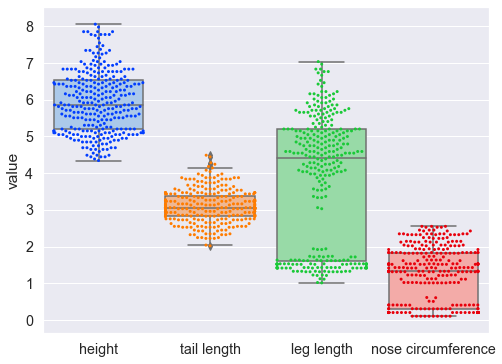

In [10]:
p1 = sns.boxplot(data=data, palette='pastel')
p1 = sns.swarmplot(data=data, palette='bright', size=3)
p1.set(ylabel='value')
p1.figure.set_size_inches((8,6))

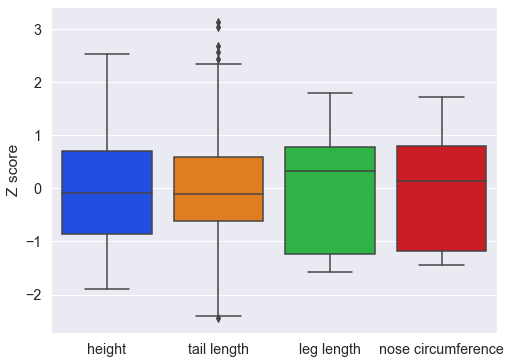

In [11]:
p2 = sns.boxplot(data=z_scores, palette='bright')
p2.set(ylabel='Z score')
p2.figure.set_size_inches((8,6))


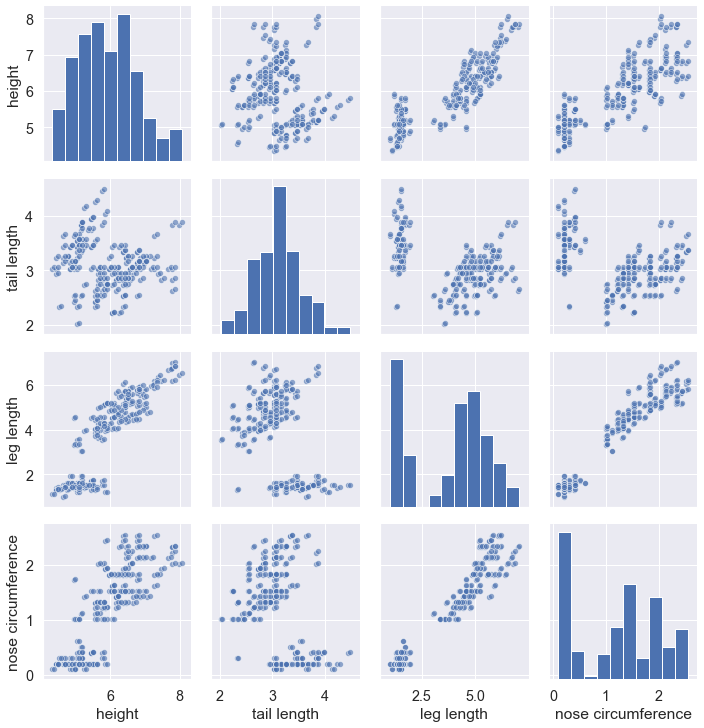

In [12]:
sns.pairplot(data=data, kind='scatter', plot_kws={'alpha': 0.6, 'lw': 0})

## K-means clustering

In [13]:
from kmeans import KMeans

In [14]:
kmeans_model = KMeans(k=3)
kmeans_model.fit(data.values)
kmeans_model.centroids

array([[5.41555026, 3.12964021, 2.81152381, 0.78875661],
       [7.26469767, 3.21204651, 6.03886047, 2.13039535],
       [6.52020588, 2.96085294, 5.19502941, 1.83110294]])

In [15]:
kmeans_model.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2, 1,
       2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 0,
       2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2], d